In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt


In [2]:
wires = 6+1+1+1+1+4+1


dev = qml.device('default.qubit', wires=wires)


@qml.qnode(dev)
def circuit(a):
    # State preparation for x1,x2
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=3)
    qml.Hadamard(wires=4)
    

    bin_a = np.binary_repr(a,3)

    index=13
    for i in bin_a:
        if(i=='1'):
            qml.PauliX(wires=index)
            index-=1
        else:
            index-=1

    
    qml.Barrier(wires=range(wires))   
     
    # convert 10 -> 00
    qml.MultiControlledX(control_wires=[0,1],control_values='01',wires=6)
    qml.ctrl(qml.PauliX(1),6)
    # extend bit
    qml.ctrl(qml.PauliX(2),1)
    # qml.Barrier(wires=range(wires))
   
    # State preparation for x2

    # convert 10 -> 00
    qml.MultiControlledX(control_wires=[3,4],control_values='01',wires=7)
    qml.ctrl(qml.PauliX(4),7)
    # extend bit
    qml.ctrl(qml.PauliX(5),4)
    qml.Barrier(wires=range(wires))
    
    
    # Circuit for f(x1,x2) = x1+x2
    qml.SWAP(wires=[0,2])
    qml.QFT(wires=[0,1,2])
    qml.CPhase(np.pi,wires=[2,5])
    qml.CPhase(np.pi/2,wires=[2,4])
    qml.CPhase(np.pi/4,wires=[2,3])
    qml.CPhase(np.pi,wires=[1,4])
    qml.CPhase(np.pi/2,wires=[1,3])
    qml.CPhase(np.pi,wires=[0,3])    
    qml.adjoint(qml.QFT(wires=[0,1,2]))
    qml.SWAP(wires=[0,2])
    
    qml.Barrier(wires=range(wires))
    
    qml.ctrl(qml.PauliX(8),2)
    qml.ctrl(qml.PauliX(2),8)
    qml.CSWAP(wires=[8,0,9])
    qml.CSWAP(wires=[8,1,10])
    
    qml.Barrier(wires=range(wires))
    

    
    #===========================================
    
     # #=========================================== # #=========================================== # #===========================================
    # prep a

    
    # Circuit for g(f(x1,x2),a) = f(x1,x2)+a
    qml.SWAP(wires=[0,2])
    qml.QFT(wires=[0,1,2])
    qml.CPhase(np.pi,wires=[2,13])
    qml.CPhase(np.pi/2,wires=[2,12])
    qml.CPhase(np.pi/4,wires=[2,11])
    qml.CPhase(np.pi,wires=[1,12])
    qml.CPhase(np.pi/2,wires=[1,11])
    qml.CPhase(np.pi,wires=[0,11])    
    qml.adjoint(qml.QFT(wires=[0,1,2]))
    qml.SWAP(wires=[0,2])
    qml.Barrier(wires=range(wires))
    
    # #===========================================
    
    
    # qml.MultiControlledX(control_values='000',control_wires=[0,1,2],wires=14)
    # qml.ControlledPhaseShift(-1, wires=[14, 1])
    # qml.ctrl(qml.PauliX(2),14)
    
    qml.PauliX(wires=2)
    qml.ControlledPhaseShift(-1, wires=[2, 0])
    # qml.ControlledPhaseShift(-1, wires=[2, 0])  
    qml.PauliX(wires=2)
    # qml.ctrl(qml.PauliX(2),14)
    # qml.ControlledPhaseShift(-1, wires=[14, 1])
    
    # #===========================================
    qml.Barrier(wires=range(wires))
    # @Inverse
    qml.SWAP(wires=[0,2])
    qml.QFT(wires=[0,1,2])
    qml.CPhase(-1*np.pi,wires=[0,11])
    qml.CPhase(-1*np.pi/2,wires=[1,11])
    qml.CPhase(-1*np.pi,wires=[1,12])
    qml.CPhase(-1*np.pi/4,wires=[2,11])
    qml.CPhase(-1*np.pi/2,wires=[2,12])
    qml.CPhase(-1*np.pi,wires=[2,13])
    qml.adjoint(qml.QFT(wires=[0,1,2]))
    qml.SWAP(wires=[0,2])
    
    
     # #=========================================== # #=========================================== # #===========================================
    # # qml.PauliX(wires=11)
    # qml.PauliX(wires=12)
    # qml.PauliX(wires=13)
    
    qml.Barrier(wires=range(wires))   
    
    qml.CSWAP(wires=[8,1,10])
    qml.CSWAP(wires=[8,0,9])
    qml.ctrl(qml.PauliX(2),8)
    qml.ctrl(qml.PauliX(8),2)
    qml.Barrier(wires=range(wires))
    
    qml.SWAP(wires=[0,2])
    qml.QFT(wires=[0,1,2])
    qml.CPhase(-1*np.pi,wires=[0,3])  ##
    qml.CPhase(-1*np.pi/2,wires=[1,3])
    qml.CPhase(-1*np.pi,wires=[1,4])
    qml.CPhase(-1*np.pi/4,wires=[2,3])
    qml.CPhase(-1*np.pi/2,wires=[2,4])
    qml.CPhase(-1*np.pi,wires=[2,5])
    qml.adjoint(qml.QFT(wires=[0,1,2]))
    qml.SWAP(wires=[0,2])
    
    qml.Barrier(wires=range(wires))
    
    qml.ctrl(qml.PauliX(5),4)
    qml.ctrl(qml.PauliX(4),7)
    qml.MultiControlledX(control_wires=[3,4],control_values='01',wires=7)

    
    # qml.Barrier(wires=range(wires))
    
    qml.ctrl(qml.PauliX(2),1)
    qml.ctrl(qml.PauliX(1),6)
    qml.MultiControlledX(control_wires=[0,1],control_values='01',wires=6)
    
    qml.Barrier(wires=range(wires)) 
    qml.Hadamard(wires=4)
    qml.Hadamard(wires=3)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=0)   
    
    
    return qml.probs(wires=[4,3,1,0])



/Users/natanil/opt/anaconda3/lib/python3.9/site-packages/pennylane/ops/qubit/non_parametric_ops.py:2005: UserWarning: The control_wires keyword will be removed soon. Use wires = (control_wires, target_wire) instead. See the documentation for more information.
  warnings.warn(


[-3, -2, -1, 0, 1, 2, 3]
[tensor(1., requires_grad=True), tensor(1., requires_grad=True), tensor(0.94612918, requires_grad=True), tensor(0.82761336, requires_grad=True), tensor(0.82761336, requires_grad=True), tensor(0.82761336, requires_grad=True), tensor(0.80247365, requires_grad=True)]


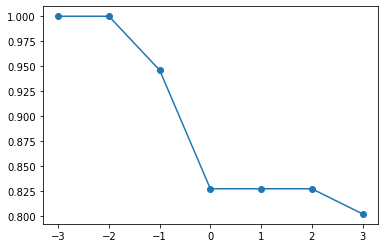

In [3]:

x=[i for i in range(-3,4)]
y=[]
for i in x:
    y.append(circuit(i)[0])
# x.reverse()
# y.reverse()
print(x)
print(y)
# plot scatter plot with x and y data
plt.scatter(x, y)
  
# plot with x and y data
plt.plot(x, y)

# results=circuit()
# print(results[0])


In [4]:




# plt.bar([np.binary_repr(i,4) for i in range(len(results))],results);
# plt.xlabel('states');
# plt.ylabel('probability');
# # plt.xticks(rotation=90);
# plt.show()

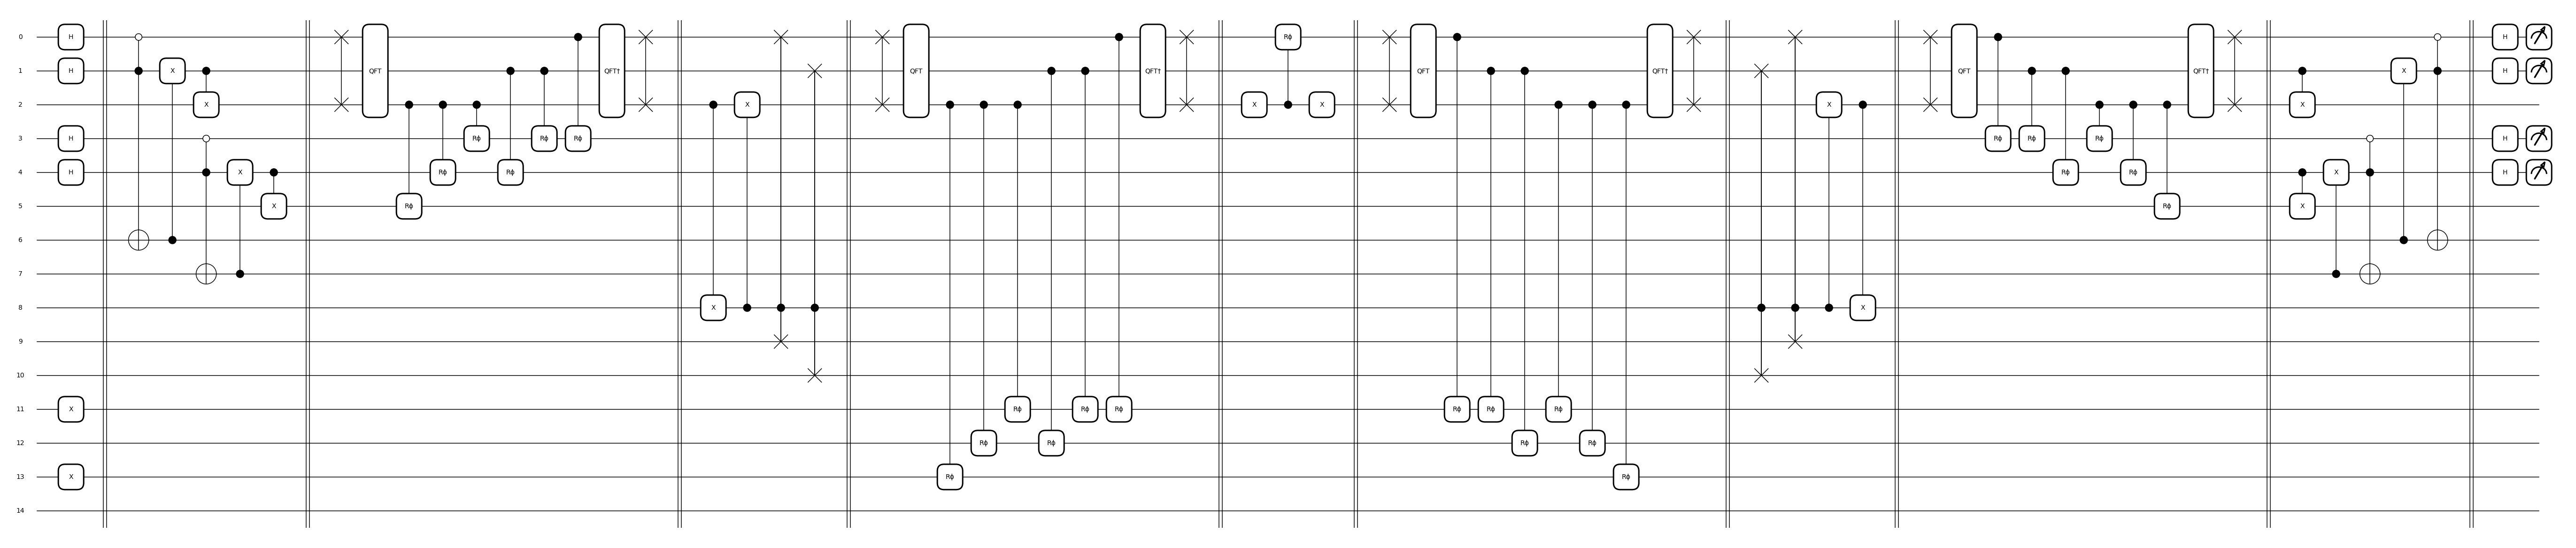

In [5]:
import matplotlib.pyplot as plt
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit)(-3)
plt.show()